# Aggregations

## Arrayの値の和
Pythonはそれ自身に組み込みの`sum`関数がある。

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

45.49173480034463

しかし、NumPyはより早く計算できる。

In [3]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

103 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
938 µs ± 80.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


`sum`と`np.sum`は同一ではないことに注意が必要。特に、それらのオプションの引数は違った意味を持ち、また`np.sum`であれば多次元のarrayも扱うことができる。

## 最大と最小
Pythonには同様に`min`と`max`の関数がある。

In [4]:
min(big_array), max(big_array)

(1.4013353585307087e-06, 0.9999992551956304)

NumPyにはこれと対応したシンタックスがあり、計算はより速い。

In [5]:
np.min(big_array), np.max(big_array)

(1.4013353585307087e-06, 0.9999992551956304)

In [6]:
%timeit min(big_array)
%timeit np.min(big_array)

148 ms ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.07 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


`min`、`max`、`sum`や他のNumPyのaggretatesに対して、arrayオブジェクト自身の関数としてより短いシンタックスを使用することが出来る。

In [7]:
print(big_array.min(), big_array.max(), big_array.sum())

1.4013353585307087e-06 0.9999992551956304 500105.9645416149


## 多次元のaggregates
多次元のararyに対して、行や列に沿ってaggregateを行うことができる。

In [8]:
M = np.random.random((3, 4))
print(M)

[[0.25220794 0.35567191 0.86646444 0.18541829]
 [0.99541207 0.04513749 0.37398866 0.31030022]
 [0.44147952 0.94836508 0.39417603 0.50179678]]


デフォルトでは、aggregate関数はarray全体のaggregateを返す。

In [9]:
M.sum()

5.670418422219469

aggregate関数はどのaxisに対してaggregateを行うかどうかを指定する追加の引数を取ることが出来る。例えば、`axis=0`を指定することで列ごとに最小の値を見出すことが出来る。

In [10]:
M.min(axis=0)

array([0.25220794, 0.04513749, 0.37398866, 0.18541829])

どうように、各行ごとに最大の値を見出すことが出来る。

In [11]:
M.max(axis=1)

array([0.86646444, 0.99541207, 0.94836508])

この`axis`キーワードは、返ってくる次元ではなく、崩壊させるarrayの次元を指定するものである。
そのため、`axis=0`を指定することは、始めのaxisが崩壊することを意味する。つまり、2次元のarrayであれば、これは列ごとにaggregateすることを意味する。

## 他のaggregate関数
たいていのaggregatesは`NaN`安全のバージョンの関数を持つ。これは`NaN`の値を無視するものである。

|Function Name|NaN-safe Version|Description|
|:------------|:-----------------|:-------------|
|np.sum|np.nansum|Compute sum of elements|
|np.prod|np.nanprod|Compute product of elements|
|np.mean|np.nanmean|Compute mean of elements|
|np.std|np.nanstd|Compute standard deviation|
|np.var|np.nanvar|Compute variance|
|np.min|np.nanmin|Find minimum value|
|np.max|np.nanmax|Find maximum value|
|np.argmin|np.nanargmin|Find index of minimum value|
|np.argmax|np.nanargmax|Find index of maximum value|
|np.median|np.nanmedian|Compute median of elements|
|np.percentile|np.nanpercentile|Compute rank-based statistics of elements|
|np.any|N/A|Evaluate whether any elements are true|
|np.all|N/A|Evaluate whether all elements are true|

## 例：アメリカ大統領の平均身長はいくつ？

In [12]:
!head -4 ../data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [13]:
import pandas as pd
data = pd.read_csv('../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [14]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


パーセンタイルと中央値を求める。（パーセンタイルはデータを小さい順に並べた時に全体のX%に位置する値。例えば50パーセンタイルは中央値となる）

In [15]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

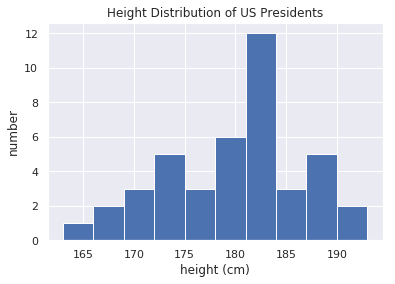

In [17]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');